In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tfe.enable_eager_execution()

In [2]:
#a = tf.zeros([1], dtype=tf.float64)
#b = tf.Tensor([[2,4], [1, 0]],  dtype=tf.float64)
#a = tf.Variable(5.0, dtype=tf.float64)

In [3]:
import numpy as np

In [4]:
real_dtype = tf.float64
cmplx_dtype = tf.complex128

In [61]:
def squared_L2_norm(x):
    """
    Squared L2 norm
    """
    if x.dtype in [tf.float64, tf.float32, tf.float16]:
        return tf.reduce_sum(tf.real(tf.multiply(tf.conj(x), x)))
    elif x.dtype in [tf.complex128, tf.complex64, tf.complex32]:
        return tf.reduce_sum(tf.multiply(x, x))
    
class RidgeModel(object):
  """
  minimize |y - A * x|_2^2
  """
  def __init__(self, A, y):
    N1, N2 = A.shape
    assert y.shape == tf.TensorShape([N1])
    
    self.y = y
    self.A = A
    self.x = tf.Variable(np.zeros((N2)), dtype=tf.float64)

  def predict_y(self):
    x_reshaped = tf.reshape(self.x, (N2,1))
    return tf.reshape(tf.matmul(self.A, x_reshaped), (N1,))

  def loss(self):
    """
    Compute mean squared error
    """
    y_pre = self.predict_y()
    assert self.y.shape == y_pre.shape
    return squared_L2_norm(self.y - y_pre)/N1

In [58]:
N1, N2 = 2, 2
np.random.seed(100)
A = tf.constant(np.random.randn(N1, N2), dtype=tf.float64)
y = tf.constant(np.random.randn(N1), dtype=tf.float64)

In [7]:
#a = tf.Variable(np.identity((4)))

In [59]:
model = RidgeModel(A, y)
print("current loss: ", model.loss())

current loss:  tf.Tensor(0.6137057518737826, shape=(), dtype=float64)


In [60]:
model.x

<tf.Variable 'Variable:0' shape=(2,) dtype=float64, numpy=array([0., 0.])>

In [67]:
#learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(0.1)
#optimizer = tf.train.AdagradOptimizer(learning_rate = 10)

#optimizer = tf.train.GradientDescentOptimizer(0.1)

def loss_f():
    loss = model.loss()
    losss.append(loss)
    return loss

losss = []
epochs = range(3000)
tol_rmse = 1e-12
for epoch in epochs:
  grads = optimizer.compute_gradients(loss_f, var_list=[model.x])
  optimizer.apply_gradients(grads, global_step=tf.train.get_or_create_global_step())
  if len(losss) > 2:
    if losss[-1] < tol_rmse**2 or np.abs(losss[-2] - losss[-1]) < tol_rmse**2:
        break
    

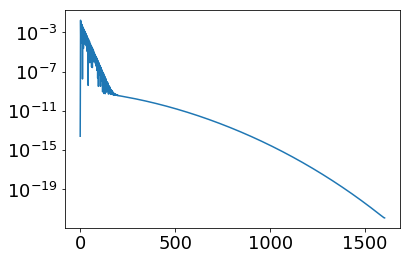

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

#print(losss)
#plt.semilogy(epochs, losss)
plt.plot(epochs[:len(losss)], losss)
plt.yscale("log")

In [69]:
model.predict_y() - y

<tf.Tensor: id=1707998, shape=(2,), dtype=float64, numpy=array([1.31360478e-11, 8.31612557e-12])>

In [70]:
model.x

<tf.Variable 'Variable:0' shape=(2,) dtype=float64, numpy=array([ -9.10097805, -43.60697671])>

In [71]:
y.numpy()

array([0.98132079, 0.51421884])

In [72]:
r = np.linalg.lstsq(A.numpy(), y.numpy())

/usr/local/var/pyenv/versions/3.6.5/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [56]:
r[0]

array([ -9.10097805, -43.60697671])

In [46]:
x_corr = r[0]
np.linalg.norm(y.numpy() - A.numpy()@x_corr)**2

3.0593011980602364e-29